# Contruct and train a simple neural network to classify radio sources

In this notebook we will contruct a simple convolutional neural network to classify a sample of point radio sources and unknown morphology. The sample dataset is small and already preprocessed. Here we will just simply load the data, split them into training and test sets, train and test the network.

In [1]:
from sklearn import datasets, cross_validation
from sknn.mlp import Classifier, Layer, Convolution
import matplotlib.pyplot as pylab
%pylab inline

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


#### Load the dataset

I have made a small dataset and done all necessary preprocessing and some other dark magic to the images.
So at this point we will just load this data and play around.

In [2]:
# Load data and labels
data = np.load('Data/data.npy')
labels = np.load('Data/labels.npy')

# Print some info
print data.shape

(1125, 60, 60)


#### Lets look at two samples from the two classes

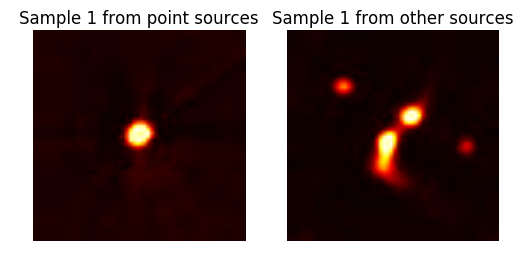

In [3]:
pylab.subplot(1,2,1)
pylab.imshow(data[1,:,:],'hot')
pylab.axis('off')
pylab.title('Sample 1 from point sources')


pylab.subplot(1,2,2)
pylab.imshow(data[897,:,:],'hot')
pylab.axis('off')
pylab.title('Sample 1 from other sources')


#### Lets split the data into training and testing samples as usual

In [4]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(data, labels, test_size=0.2)

#### We will be using a Convolutional Neural Network (CNN) to work the problem

For now treat the CNN as a black box and believe in me. You can find plenty of resources on the web. 
Simply speaking this neural network has 
* Input Layer

* 3 hidden layers

* Output layer with two neurons


The network will train until a threshold condition for the loss function has reached.

In [5]:
# Create a neural network that uses convolution to scan the input images.
nn = Classifier(
    layers=[
        Convolution('Rectifier', channels=8, kernel_shape=(3, 3), border_mode='valid'),
        Convolution('Tanh', channels=10, kernel_shape=(3, 3), border_mode='valid'),
        Layer('Rectifier', units=64),
        Layer('Softmax')],
    learning_rate=0.002,
    valid_size=0.2,
    n_stable=10,
    verbose=True)

In [6]:
# Train the network
nn.fit(X_train, y_train)


Initializing neural network with 4 layers, 3600 inputs and 2 outputs.
  - Convl: Rectifier  Output: (58, 58)   Channels: 8
  - Convl: Tanh       Output: (56, 56)   Channels: 10
  - Dense: Rectifier  Units:  64  
  - Dense: Softmax    Units:  2   



/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
/usr/local/lib/python2.7/dist-packages/lasagne/layers/conv.py:489: UserWarning: The `image_shape` keyword argument to `tensor.nnet.conv2d` is deprecated, it has been renamed to `input_shape`.
  border_mode=border_mode)


Training on dataset of 900 samples with 3,241,800 total size.
  - Reshaping input array from (900, 60, 60) to (720, 1, 60, 60).
  - Train: 720        Valid: 180 
  - Early termination after 10 stable iterations.

Epoch       Training Error       Validation Error       Time
------------------------------------------------------------
    1          4.687e-01             3.817e-01         16.2s
    2          2.396e-01             2.186e-01         15.2s
    3          1.396e-01             2.194e-01         15.8s
    4          6.580e-02             2.008e-01         17.2s
    5          9.679e-02             2.216e-01         15.5s
    6          1.883e-02             2.537e-01         16.4s
    7          1.259e-02             3.784e-01         16.1s
    8          1.247e-01             1.972e-01         16.2s
    9          1.169e-02             2.212e-01         16.0s
   10          5.353e-03             2.141e-01         16.1s
   11          3.227e-03             2.199e-01         

Classifier(batch_size=1, callback=None, debug=False, dropout_rate=None,
      f_stable=0.001,
      hidden0=<sknn.nn.Convolution `Rectifier`: channels=8, scale_factor=(1, 1), name=u'hidden0', frozen=False, kernel_shape=(3, 3), kernel_stride=(1, 1), pool_shape=(1, 1), border_mode='valid'>,
      hidden1=<sknn.nn.Convolution `Tanh`: channels=10, scale_factor=(1, 1), name=u'hidden1', frozen=False, kernel_shape=(3, 3), kernel_stride=(1, 1), pool_shape=(1, 1), border_mode='valid'>,
      hidden2=<sknn.nn.Layer `Rectifier`: units=64, name=u'hidden2', frozen=False>,
      layers=[<sknn.nn.Convolution `Rectifier`: channels=8, scale_factor=(1, 1), name=u'hidden0', frozen=False, kernel_shape=(3, 3), kernel_stride=(1, 1), pool_shape=(1, 1), border_mode='valid'>, <sknn.nn.Convolution `Tanh`: channels=10, scale_factor=(1, 1), name=u'hidden1', frozen=False, kernel_shape=(3,...4, name=u'hidden2', frozen=False>, <sknn.nn.Layer `Softmax`: units=2, name=u'output', frozen=False>],
      learning_momentum

#### Now test the network model and print the training and accuracy testing scores

In [7]:
# Determine how well it does on training data and unseen test data.
print('TRAIN SCORE', nn.score(X_train, y_train)*100)
print('TEST SCORE', nn.score(X_test, y_test)*100)


[(900, 2)]
('TRAIN SCORE', 98.444444444444443)
[(225, 2)]
('TEST SCORE', 92.0)


#### Do the prediction

In [8]:
y_pred = nn.predict(X_test)

[(225, 2)]


In [9]:
yp = np.copy(y_pred)
yt = np.copy(y_train)
yp = yp.astype('str')
yt = yt.astype('str')

yp[np.where(yp=='1.0')[0]]='Point'
yp[np.where(yp=='2.0')[0]]='Extnd'

yt[np.where(yt=='1.0')[0]]='Point'
yt[np.where(yt=='2.0')[0]]='Extnd'

#### Lets have a look at the predictions

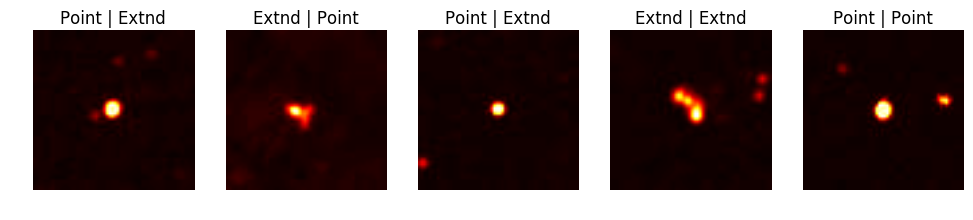

In [10]:
pylab.figure(figsize=(12, 12))
for i in range(0,5):
    pylab.subplot(1,5,i+1)
    pylab.imshow(X_test[i,:,:],'hot')
    pylab.axis('off')
    pylab.title('%s | %s' % (yp[i][0],yt[i] ) )